In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## **Step 1: Reading and analysing data**

In [2]:
# read the data
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.info()

# all columns have non-null values
# Apart from date all other variables are in numeric form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Figure size 1500x1000 with 0 Axes>

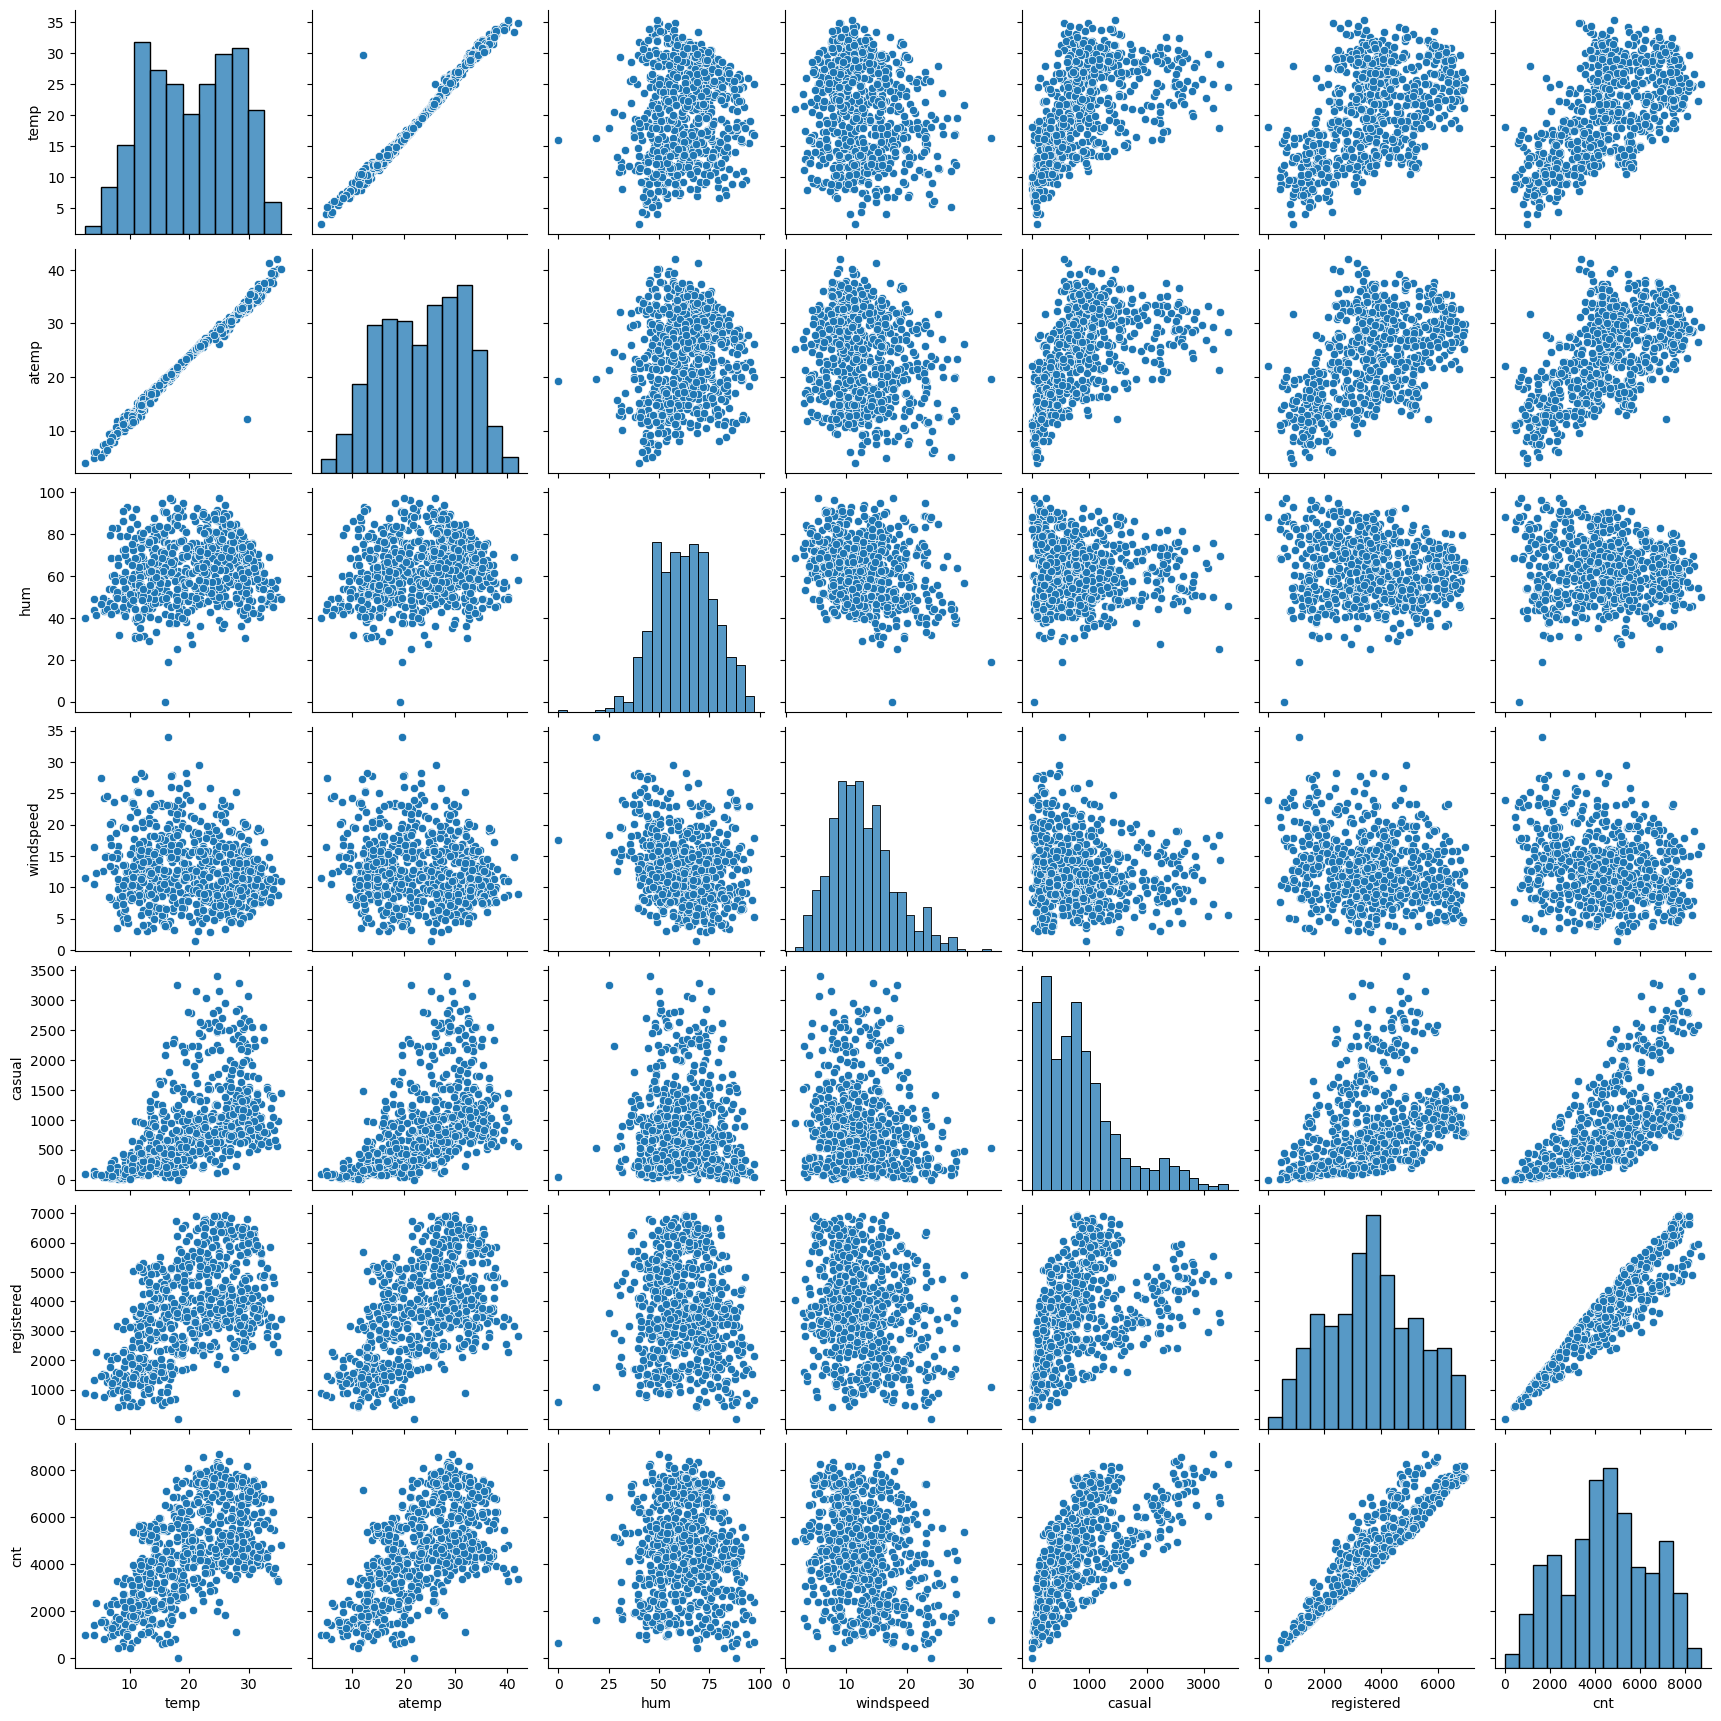

In [5]:
# pairplot for numerial columns
plt.figure(figsize=(15,10))
sns.pairplot(bike[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

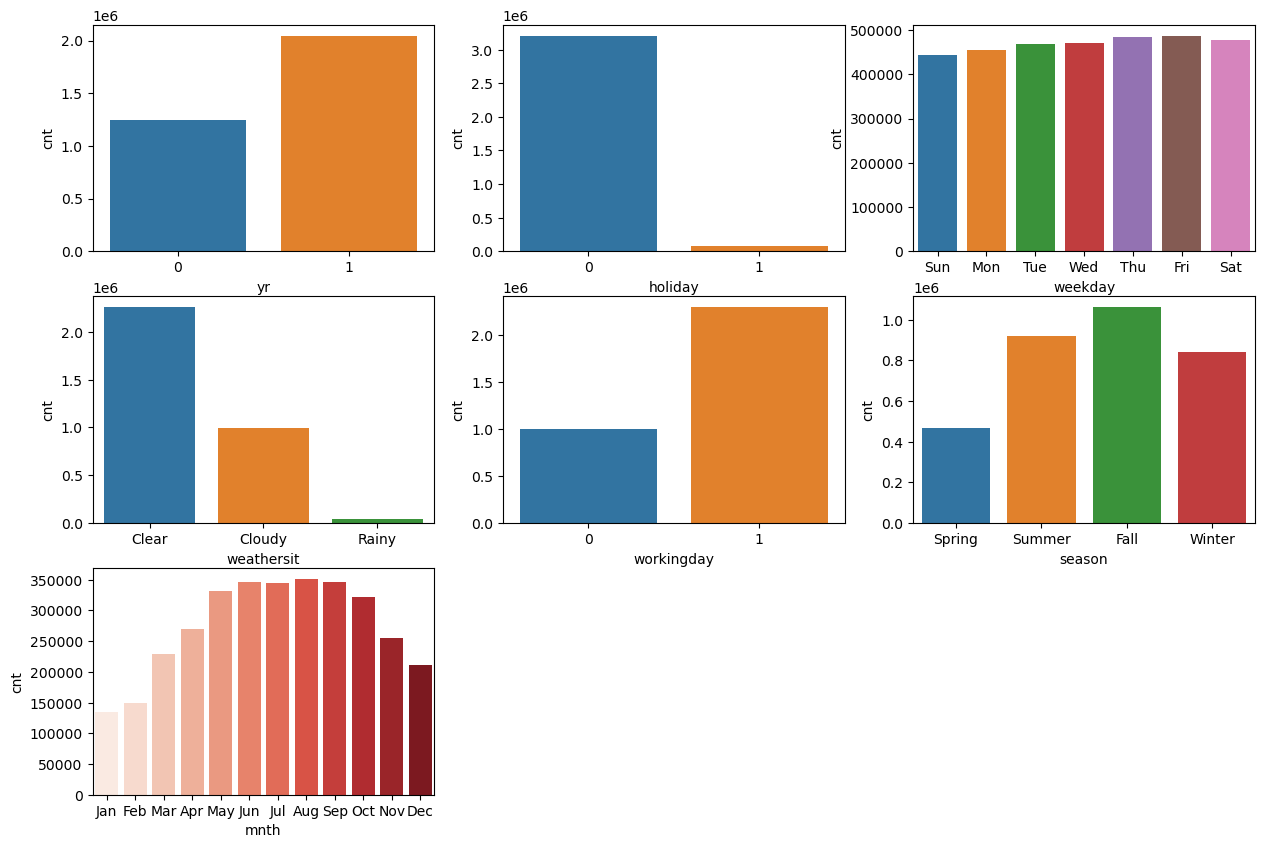

In [6]:
# visualising the categorical variables
plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
year_sum = bike.groupby('yr')['cnt'].sum().reset_index()
sns.barplot(x='yr', y='cnt', data=year_sum)

plt.subplot(3,3,2)
holiday_sum = bike.groupby('holiday')['cnt'].sum().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_sum)

plt.subplot(3,3,3)
weekday_sum = bike.groupby('weekday')['cnt'].sum().reset_index()
sns.barplot(x='weekday', y='cnt', data=weekday_sum)
new_labels = ['Sun', 'Mon', 'Tue','Wed','Thu','Fri','Sat']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.subplot(3,3,4)
weathersit_sum = bike.groupby('weathersit')['cnt'].sum().reset_index()
sns.barplot(x='weathersit', y='cnt', data=weathersit_sum)
# Rename the x-axis categories
new_labels = ['Clear', 'Cloudy', 'Rainy']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.subplot(3,3,5)
workingday_sum = bike.groupby('workingday')['cnt'].sum().reset_index()
sns.barplot(x='workingday', y='cnt', data=workingday_sum)

plt.subplot(3,3,6)
season_sum = bike.groupby('season')['cnt'].sum().reset_index()
sns.barplot(x='season', y='cnt', data=season_sum)
# Rename the x-axis categories
new_labels = ['Spring', 'Summer', 'Fall','Winter']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.subplot(3,3,7)
mnth_sum = bike.groupby('mnth')['cnt'].sum().reset_index()
sns.barplot(x='mnth', y='cnt', data=mnth_sum, palette='Reds')
new_labels = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.show()

## Conclusion 
# more number of bikes are rented in Fall, followed by summer, winter and spring
# more number of bikes are rented on Clear day, folowed by Cloudy and Rainy
# There is increase in bike rent in 2019
# Most bike rented in June and September

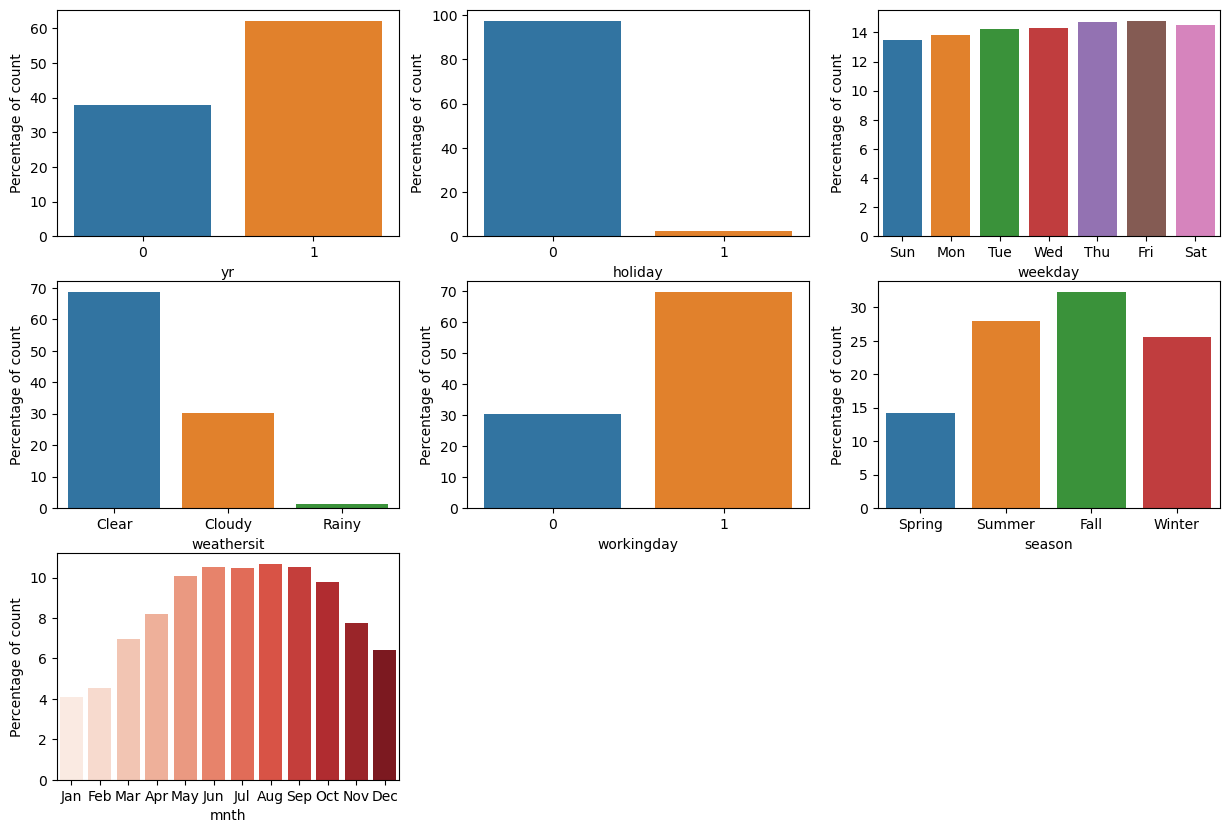

In [7]:
# visualising the categorical variables
plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
year_sum = bike.groupby('yr')['cnt'].sum().reset_index()
total_count = year_sum['cnt'].sum()
year_sum['percentage'] = (year_sum['cnt'] / total_count) * 100
sns.barplot(y='percentage', x='yr', data=year_sum)
plt.ylabel('Percentage of count')

plt.subplot(3,3,2)
holiday_sum = bike.groupby('holiday')['cnt'].sum().reset_index()
total_count = holiday_sum['cnt'].sum()
holiday_sum['percentage'] = (holiday_sum['cnt'] / total_count) * 100
sns.barplot(x='holiday', y='percentage', data=holiday_sum)
plt.ylabel('Percentage of count')

plt.subplot(3,3,3)
weekday_sum = bike.groupby('weekday')['cnt'].sum().reset_index()
total_count = weekday_sum['cnt'].sum()
weekday_sum['percentage'] = (weekday_sum['cnt'] / total_count) * 100
sns.barplot(x='weekday', y='percentage', data=weekday_sum)
new_labels = ['Sun', 'Mon', 'Tue','Wed','Thu','Fri','Sat']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.ylabel('Percentage of count')

plt.subplot(3,3,4)
weathersit_sum = bike.groupby('weathersit')['cnt'].sum().reset_index()
total_count = weathersit_sum['cnt'].sum()
weathersit_sum['percentage'] = (weathersit_sum['cnt'] / total_count) * 100
sns.barplot(x='weathersit', y='percentage', data=weathersit_sum)
# Rename the x-axis categories
new_labels = ['Clear', 'Cloudy', 'Rainy']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.ylabel('Percentage of count')

plt.subplot(3,3,5)
workingday_sum = bike.groupby('workingday')['cnt'].sum().reset_index()
total_count = workingday_sum['cnt'].sum()
workingday_sum['percentage'] = (workingday_sum['cnt'] / total_count) * 100
sns.barplot(x='workingday', y='percentage', data=workingday_sum)
plt.ylabel('Percentage of count')

plt.subplot(3,3,6)
season_sum = bike.groupby('season')['cnt'].sum().reset_index()
total_count = season_sum['cnt'].sum()
season_sum['percentage'] = (season_sum['cnt'] / total_count) * 100
sns.barplot(x='season', y='percentage', data=season_sum)
# Rename the x-axis categories
new_labels = ['Spring', 'Summer', 'Fall','Winter']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.ylabel('Percentage of count')

plt.subplot(3,3,7)
mnth_sum = bike.groupby('mnth')['cnt'].sum().reset_index()
total_count = mnth_sum['cnt'].sum()
mnth_sum['percentage'] = (mnth_sum['cnt'] / total_count) * 100
sns.barplot(x='mnth', y='percentage', data=mnth_sum, palette='Reds')
new_labels = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.ylabel('Percentage of count')
plt.show()

## Conclusion 
# more number of bikes are rented in Fall, followed by summer, winter and spring
# more number of bikes are rented on Clear day, folowed by Cloudy and Rainy
# There is increase in bike rent in 2019
# Most bike rented in June and September

## Data cleaning
- Droping unused columns
- Rename columns

### Dropping unused columns

In [8]:
# delete instant- as it is ust primary key/index
bike = bike.drop('instant', axis=1)

In [9]:
# delete dteday- as there are year, month columnsfor details
bike = bike.drop('dteday', axis=1)

In [10]:
# delete registered and casual- registered + casual = cnt
bike = bike.drop('registered', axis=1)
bike = bike.drop('casual', axis=1)

### Renaming columns

In [11]:
# Rename columns
bike.rename(columns = {'hum':'humidity','yr':'year_2019'}, inplace=True)

## Univariant analysis

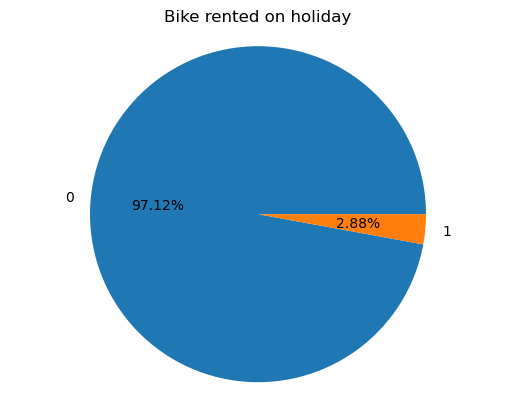

In [12]:
plt.pie(bike.holiday.value_counts().values,labels=bike.holiday.value_counts().index, autopct='%.2f%%')
plt.axis('equal')
plt.title('Bike rented on holiday')
plt.show()
## more people take bikes on non holiday

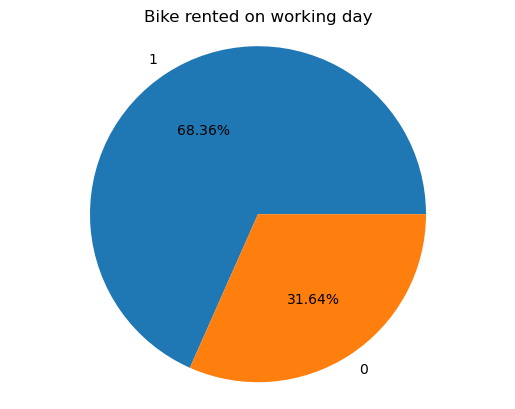

In [13]:
plt.pie(bike.workingday.value_counts().values,labels=bike.workingday.value_counts().index, autopct='%.2f%%')
plt.axis('equal')
plt.title('Bike rented on working day')
plt.show()
## more people take bikes on working day

## Bivariate analysis
- Since we now about the target variable, hence the analysis will be against cnt the target variable

<Figure size 1500x1000 with 0 Axes>

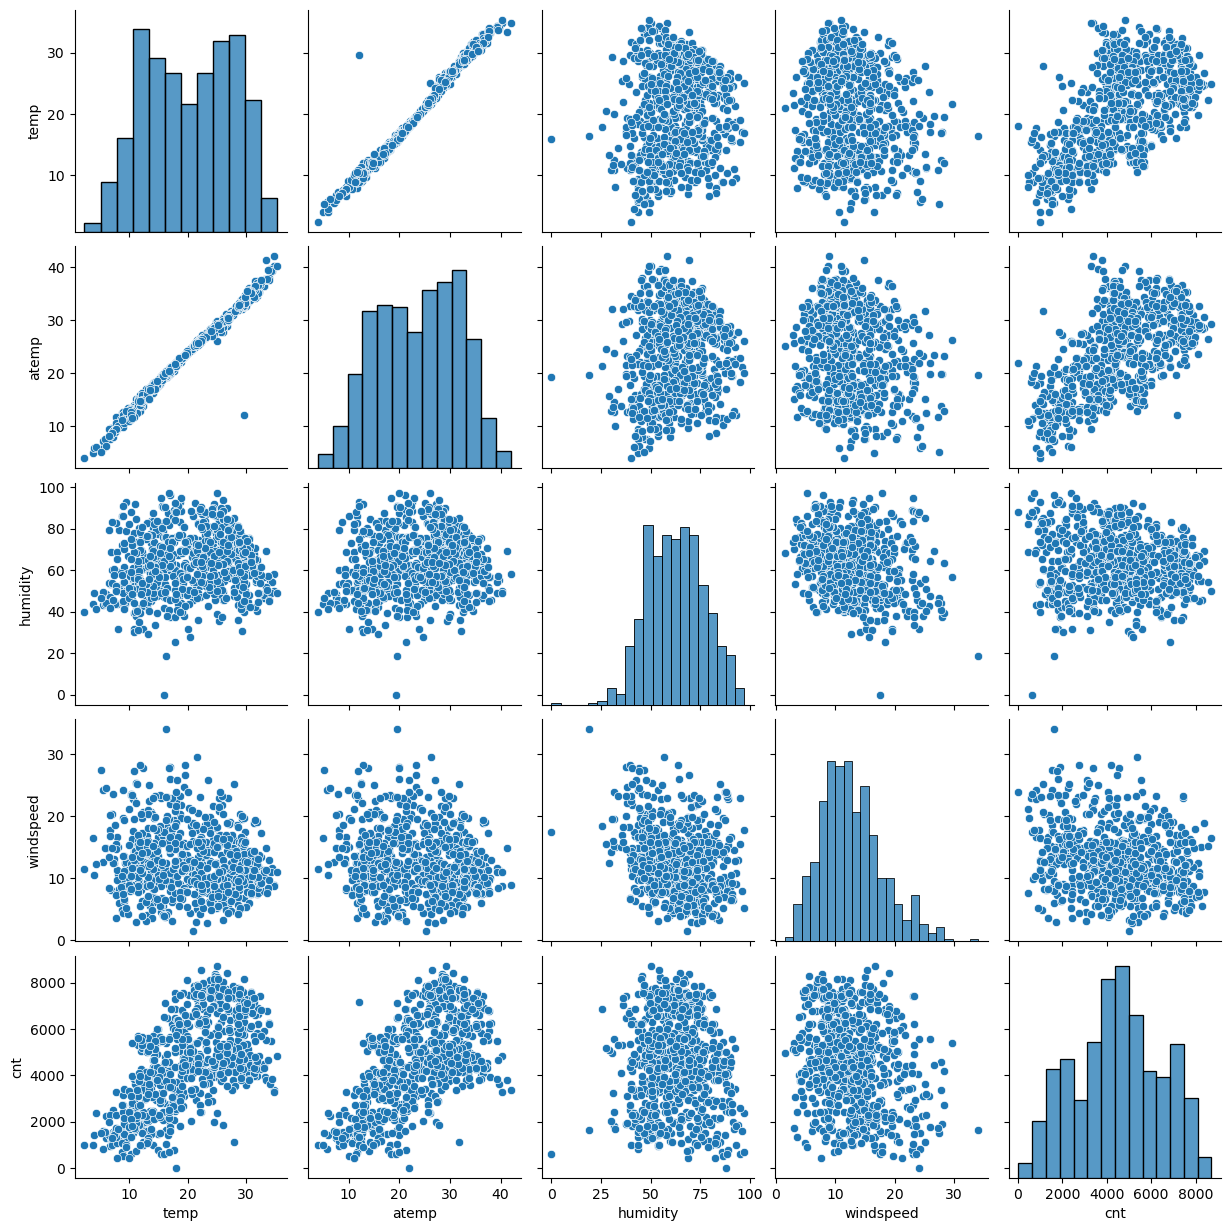

In [14]:
# pairplot for numerial columns
plt.figure(figsize=(15,10))
sns.pairplot(bike[['temp','atemp','humidity','windspeed','cnt']])
plt.show()
# temp and atemp are correlated to cnt

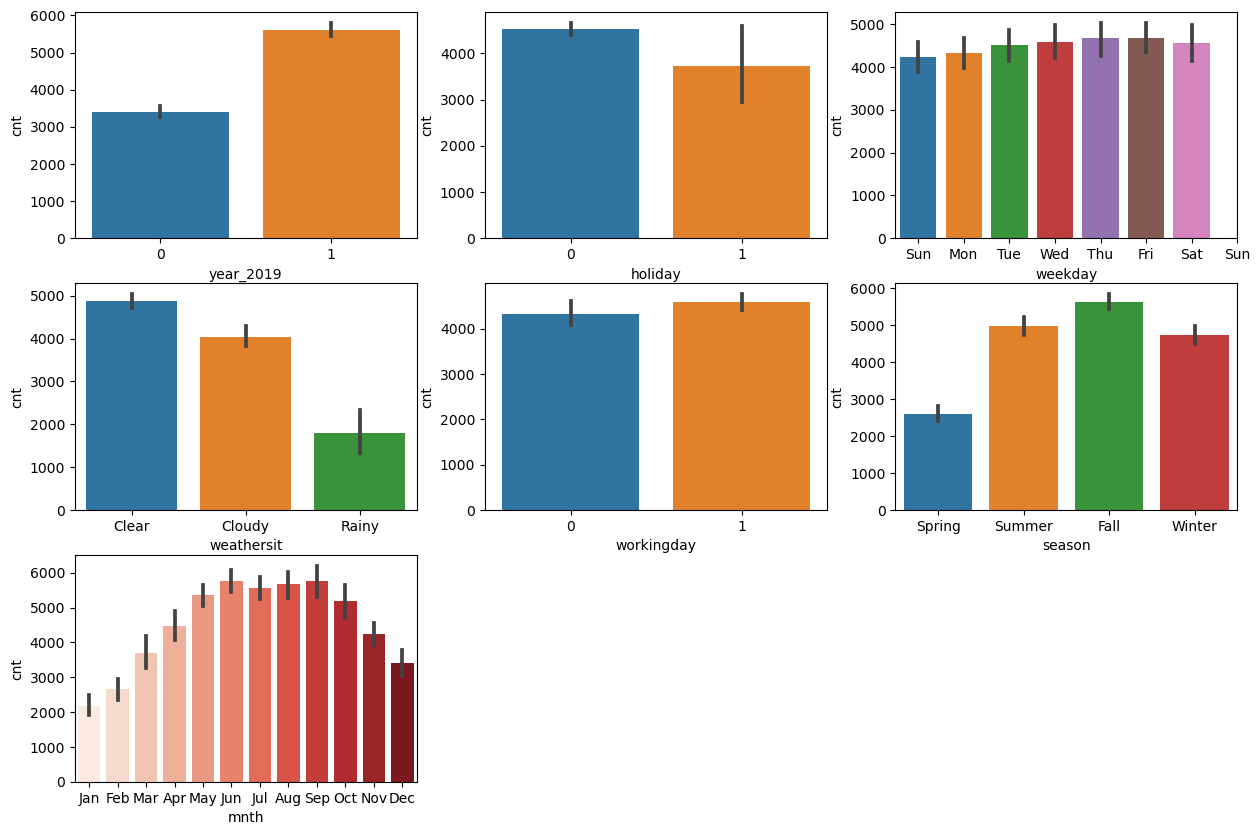

In [15]:
# visualising the categorical variables
plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
sns.barplot(x='year_2019', y='cnt', data=bike)

plt.subplot(3,3,2)
sns.barplot(x='holiday', y='cnt', data=bike)

plt.subplot(3,3,3)
sns.barplot(x='weekday', y='cnt', data=bike)
new_labels = ['Sun', 'Mon', 'Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.subplot(3,3,4)
sns.barplot(x='weathersit', y='cnt', data=bike)
# Rename the x-axis categories
new_labels = ['Clear', 'Cloudy', 'Rainy']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.subplot(3,3,5)
sns.barplot(x='workingday', y='cnt', data=bike)

plt.subplot(3,3,6)
sns.barplot(x='season', y='cnt', data=bike)
# Rename the x-axis categories
new_labels = ['Spring', 'Summer', 'Fall','Winter']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.subplot(3,3,7)
sns.barplot(x='mnth', y='cnt', data=bike, palette='Reds')
new_labels = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.show()

## Conclusion 
# more number of bikes are rented in Fall, followed by summer, winter and spring
# more number of bikes are rented on Clear day, folowed by Cloudy and Rainy
# There is increase in bie rent in 2019
# Most bike rented in June and September

## **Step 2: Preparing the Data for Modelling**
- Encoding:
  - Converting binary vars to 1/0
  - Other categorical vars to dummy vars


### Creating dummy variables

In [16]:
# dummy variables for weathersit
# dropping a redundant dummy var
weather=pd.get_dummies(bike['weathersit'], drop_first=True)
weather.rename(columns = {2:'cloudy', 3:'rainy'}, inplace=True)
# concat dummy df with original one
bike = pd.concat([bike, weather], axis=1)
# drop weathersit
bike = bike.drop('weathersit', axis=1)
bike.head()

,season,year_2019,mnth,holiday,weekday,workingday,temp,atemp,humidity,windspeed,cnt,cloudy,rainy
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [17]:
# dummy variables for weekday
# dropping a redundant dummy var
weekday=pd.get_dummies(bike['weekday'], drop_first=True)
weekday.rename(columns = {1:'monday', 2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}, inplace=True)
weekday.head()
# concat dummy df with original one
bike = pd.concat([bike, weekday], axis=1)
# drop weekday
bike = bike.drop('weekday', axis=1)
bike.head()

,season,year_2019,mnth,holiday,workingday,temp,atemp,humidity,windspeed,cnt,cloudy,rainy,monday,tuesday,wednesday,thursday,friday,saturday
0,1,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1
1,1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0
2,1,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0
3,1,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0
4,1,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,1,0,0,0


In [18]:
# dummy variables for mnth
# dropping a redundant dummy var
mnth=pd.get_dummies(bike['mnth'], drop_first=True)
mnth.rename(columns = {2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'}, inplace=True)
mnth.head()
# concat dummy df with original one
bike = pd.concat([bike, mnth], axis=1)
# drop mnth
bike = bike.drop('mnth', axis=1)
bike.head()

,season,year_2019,holiday,workingday,temp,atemp,humidity,windspeed,cnt,cloudy,...,march,april,may,june,july,august,september,october,november,december
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# dummy variables for mnth
# dropping a redundant dummy var
season=pd.get_dummies(bike['season'], drop_first=True)
season.rename(columns = {2:'summer',3:'fall',4:'winter'}, inplace=True)
season.head()
# concat dummy df with original one
bike = pd.concat([bike, season], axis=1)
# drop season
bike = bike.drop('season', axis=1)
bike.head()

,year_2019,holiday,workingday,temp,atemp,humidity,windspeed,cnt,cloudy,rainy,...,june,july,august,september,october,november,december,summer,fall,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike.columns

Index(['year_2019', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'cloudy', 'rainy', 'monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'february', 'march', 'april', 'may',
       'june', 'july', 'august', 'september', 'october', 'november',
       'december', 'summer', 'fall', 'winter'],
      dtype='object')

### Splitting into train and test

In [21]:
df_train, df_test = train_test_split(bike, train_size=0.8, random_state=100)
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


### Rescaling the Feature - Training set

In [22]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# 2. Fit on data
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_train.head()

,year_2019,holiday,workingday,temp,atemp,humidity,windspeed,cnt,cloudy,rainy,...,june,july,august,september,october,november,december,summer,fall,winter
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,0,0,...,0,0,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,0,0,0,0,1,0,0,0,0,1
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,0,0,...,0,0,0,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,1,0,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rescaling the Feature - Test set

In [23]:
# create a list of numeric vars
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# 2. Fit on data
df_test[num_vars]= scaler.transform(df_test[num_vars])
df_test.head()

,year_2019,holiday,workingday,temp,atemp,humidity,windspeed,cnt,cloudy,rainy,...,june,july,august,september,october,november,december,summer,fall,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,...,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,1,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,1,0,0


In [24]:
df_train[num_vars].describe()

,temp,atemp,humidity,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.537414,0.513175,0.649499,0.319463,0.515792
std,0.225336,0.211663,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340113,0.331819,0.535852,0.199177,0.350696
50%,0.545191,0.530558,0.653714,0.294764,0.522837
75%,0.736512,0.690521,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000


## **Step3: Training the Model**

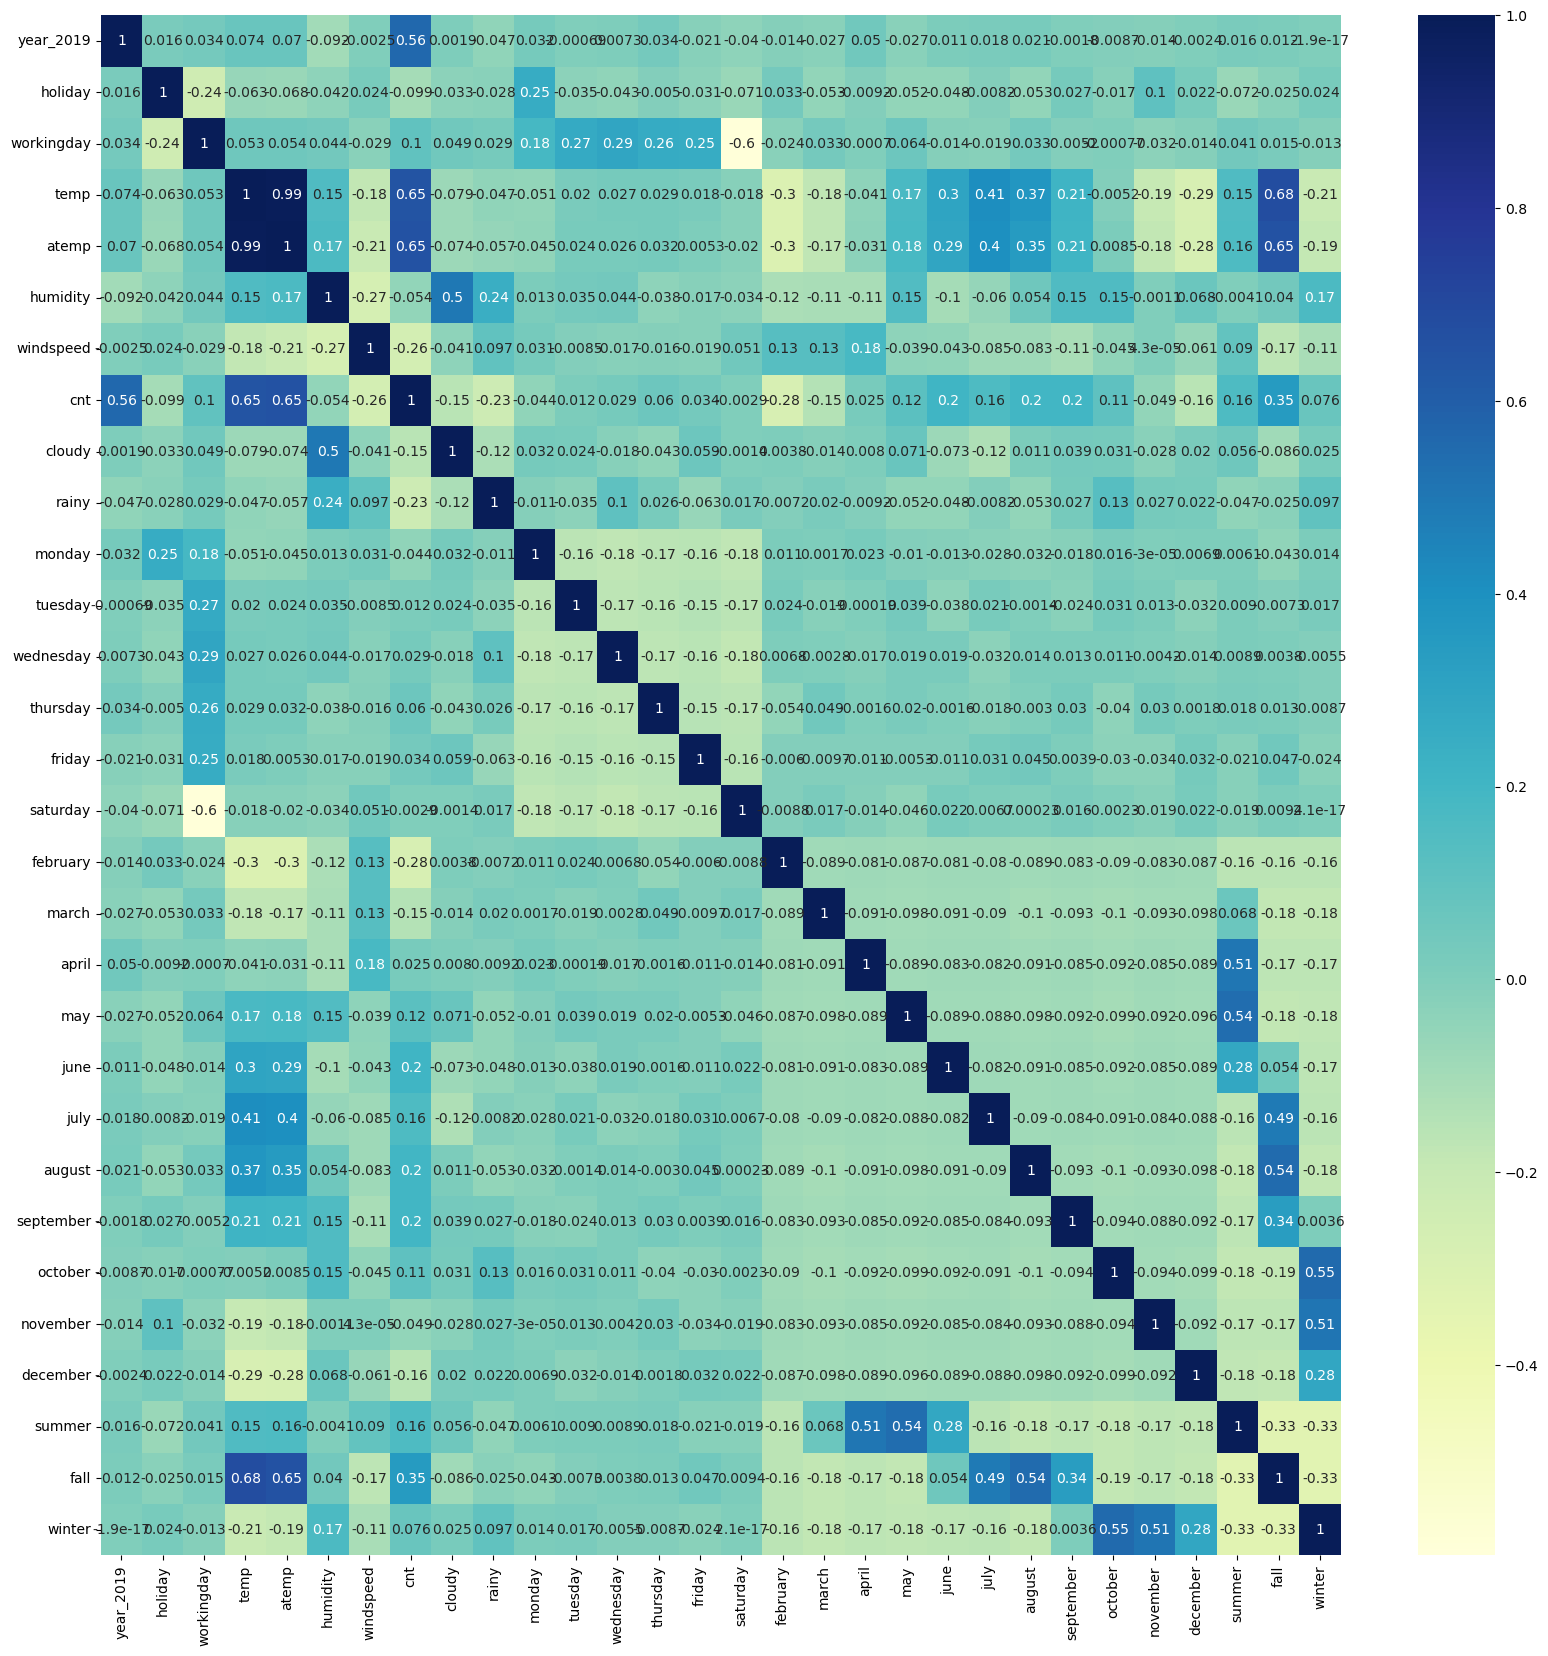

In [25]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [26]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

## **Model 1 - Using all variables - **

In [27]:
# building a model with all variables
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.26e-215
Time:                        10:03:10   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     555   BIC:                            -1042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1624      0.028      5.790      0.000       0.107       0.217
year_2019      0.2293      0.007     31.082      0.000       0.215       0.244
holiday       -0.0417      0.021     -2.013      0.045      -0.082      -0.001
workingday     0.0494      0.008      5.933      0.000       0.033       0.066
temp           0.3825      0.135      2.828      0.005       0.117       0.648
atemp          0.0680      0.133      0.510      0.610      -0.194       0.330
humidity      -0.1444      0.036     -3.993      0.000      -0.215      -0.073
windspeed     -0.1789      0.024     -7.352      0.000      -0.227      -0.131
cloudy        -0.0592      0.010     -6.127      0.000      -0.078      -0.040
rainy         -0.2625      0.025    -10.458      0.000      -0.312      -0.213
monday        -0.0101      0.009     -1.127      0.260      -0.028       0.007
tuesday       -0.0086      0.010     -0.858      0.391      -0.028       0.011
wednesday      0.0071      0.010      0.748      0.455      -0.012       0.026
thursday       0.0046      0.010      0.461      0.645      -0.015       0.024
friday         0.0146      0.010      1.417      0.157      -0.006       0.035
saturday       0.0605      0.013      4.616      0.000       0.035       0.086
february       0.0300      0.018      1.628      0.104      -0.006       0.066
march          0.0616      0.021      2.987      0.003       0.021       0.102
april          0.0587      0.031      1.875      0.061      -0.003       0.120
may            0.0776      0.034      2.310      0.021       0.012       0.144
june           0.0692      0.036      1.947      0.052      -0.001       0.139
july           0.0249      0.040      0.627      0.531      -0.053       0.103
august         0.0773      0.038      2.037      0.042       0.003       0.152
september      0.1366      0.034      4.067      0.000       0.071       0.203
october        0.0719      0.030      2.359      0.019       0.012       0.132
november       0.0085      0.029      0.290      0.772      -0.049       0.066
december       0.0068      0.023      0.296      0.767      -0.038       0.052
summer         0.0978      0.022      4.366      0.000       0.054       0.142
fall           0.0564      0.027      2.068      0.039       0.003       0.110
winter         0.1646      0.023      7.225      0.000       0.120       0.209
==============================================================================
Omnibus:                      106.744   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.955
Skew:                          -0.888   Prob(JB):                     6.02e-67
Kurtosis:                       6.062   Cond. No.                     6.72e+15
==============================================================================

N

In [28]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,thursday,inf
13,friday,inf
2,workingday,inf
1,holiday,inf
9,monday,inf
10,tuesday,inf
11,wednesday,inf
3,temp,480.91
4,atemp,423.70
5,humidity,20.89


In [29]:
X = X_train.drop("atemp", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.29e-216
Time:                        10:03:11   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1628      0.028      5.814      0.000       0.108       0.218
year_2019      0.2292      0.007     31.107      0.000       0.215       0.244
holiday       -0.0424      0.021     -2.051      0.041      -0.083      -0.002
workingday     0.0495      0.008      5.951      0.000       0.033       0.066
temp           0.4480      0.042     10.610      0.000       0.365       0.531
humidity      -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed     -0.1816      0.024     -7.654      0.000      -0.228      -0.135
cloudy        -0.0593      0.010     -6.144      0.000      -0.078      -0.040
rainy         -0.2636      0.025    -10.548      0.000      -0.313      -0.215
monday        -0.0099      0.009     -1.111      0.267      -0.027       0.008
tuesday       -0.0086      0.010     -0.861      0.390      -0.028       0.011
wednesday      0.0070      0.010      0.734      0.463      -0.012       0.026
thursday       0.0046      0.010      0.462      0.645      -0.015       0.024
friday         0.0141      0.010      1.371      0.171      -0.006       0.034
saturday       0.0606      0.013      4.620      0.000       0.035       0.086
february       0.0303      0.018      1.646      0.100      -0.006       0.067
march          0.0618      0.021      2.996      0.003       0.021       0.102
april          0.0592      0.031      1.893      0.059      -0.002       0.121
may            0.0772      0.034      2.298      0.022       0.011       0.143
june           0.0682      0.035      1.923      0.055      -0.001       0.138
july           0.0242      0.040      0.609      0.543      -0.054       0.102
august         0.0758      0.038      2.004      0.046       0.002       0.150
september      0.1362      0.034      4.058      0.000       0.070       0.202
october        0.0720      0.030      2.364      0.018       0.012       0.132
november       0.0087      0.029      0.299      0.765      -0.049       0.066
december       0.0071      0.023      0.311      0.756      -0.038       0.052
summer         0.0979      0.022      4.374      0.000       0.054       0.142
fall           0.0558      0.027      2.051      0.041       0.002       0.109
winter         0.1648      0.023      7.237      0.000       0.120       0.209
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.625
Skew:                          -0.880   Prob(JB):                     5.25e-66
Kurtosis:                       6.043   Cond. No.                     6.78e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [30]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,friday,inf
10,wednesday,inf
2,workingday,inf
1,holiday,inf
11,thursday,inf
8,monday,inf
9,tuesday,inf
3,temp,46.64
4,humidity,20.67
26,fall,14.45


In [31]:
X = X.drop("thursday", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.29e-216
Time:                        10:03:11   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1628      0.028      5.814      0.000       0.108       0.218
year_2019      0.2292      0.007     31.107      0.000       0.215       0.244
holiday       -0.0378      0.026     -1.428      0.154      -0.090       0.014
workingday     0.0540      0.014      3.986      0.000       0.027       0.081
temp           0.4480      0.042     10.610      0.000       0.365       0.531
humidity      -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed     -0.1816      0.024     -7.654      0.000      -0.228      -0.135
cloudy        -0.0593      0.010     -6.144      0.000      -0.078      -0.040
rainy         -0.2636      0.025    -10.548      0.000      -0.313      -0.215
monday        -0.0145      0.014     -1.051      0.294      -0.042       0.013
tuesday       -0.0132      0.014     -0.941      0.347      -0.041       0.014
wednesday      0.0024      0.013      0.181      0.857      -0.024       0.029
friday         0.0095      0.014      0.667      0.505      -0.019       0.038
saturday       0.0606      0.013      4.620      0.000       0.035       0.086
february       0.0303      0.018      1.646      0.100      -0.006       0.067
march          0.0618      0.021      2.996      0.003       0.021       0.102
april          0.0592      0.031      1.893      0.059      -0.002       0.121
may            0.0772      0.034      2.298      0.022       0.011       0.143
june           0.0682      0.035      1.923      0.055      -0.001       0.138
july           0.0242      0.040      0.609      0.543      -0.054       0.102
august         0.0758      0.038      2.004      0.046       0.002       0.150
september      0.1362      0.034      4.058      0.000       0.070       0.202
october        0.0720      0.030      2.364      0.018       0.012       0.132
november       0.0087      0.029      0.299      0.765      -0.049       0.066
december       0.0071      0.023      0.311      0.756      -0.038       0.052
summer         0.0979      0.022      4.374      0.000       0.054       0.142
fall           0.0558      0.027      2.051      0.041       0.002       0.109
winter         0.1648      0.023      7.237      0.000       0.120       0.209
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.625
Skew:                          -0.880   Prob(JB):                     5.25e-66
Kurtosis:                       6.043   Cond. No.                         44.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,46.64
4,humidity,20.67
25,fall,14.45
26,winter,10.04
19,august,10.01
24,summer,9.55
18,july,9.15
2,workingday,8.93
16,may,7.59
17,june,7.39


In [33]:
X = X.drop("wednesday", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     130.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.90e-217
Time:                        10:03:12   Log-Likelihood:                 613.11
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     557   BIC:                            -1054.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.028      5.816      0.000       0.108       0.218
year_2019      0.2292      0.007     31.134      0.000       0.215       0.244
holiday       -0.0366      0.026     -1.430      0.153      -0.087       0.014
workingday     0.0553      0.011      4.823      0.000       0.033       0.078
temp           0.4479      0.042     10.618      0.000       0.365       0.531
humidity      -0.1433      0.036     -3.976      0.000      -0.214      -0.072
windspeed     -0.1816      0.024     -7.659      0.000      -0.228      -0.135
cloudy        -0.0593      0.010     -6.151      0.000      -0.078      -0.040
rainy         -0.2635      0.025    -10.556      0.000      -0.313      -0.214
monday        -0.0158      0.012     -1.338      0.182      -0.039       0.007
tuesday       -0.0144      0.012     -1.207      0.228      -0.038       0.009
friday         0.0082      0.012      0.667      0.505      -0.016       0.032
saturday       0.0606      0.013      4.624      0.000       0.035       0.086
february       0.0304      0.018      1.653      0.099      -0.006       0.067
march          0.0617      0.021      2.996      0.003       0.021       0.102
april          0.0592      0.031      1.895      0.059      -0.002       0.121
may            0.0772      0.034      2.301      0.022       0.011       0.143
june           0.0684      0.035      1.928      0.054      -0.001       0.138
july           0.0243      0.040      0.612      0.541      -0.054       0.102
august         0.0759      0.038      2.010      0.045       0.002       0.150
september      0.1362      0.034      4.063      0.000       0.070       0.202
october        0.0721      0.030      2.369      0.018       0.012       0.132
november       0.0087      0.029      0.298      0.766      -0.049       0.066
december       0.0071      0.023      0.310      0.757      -0.038       0.052
summer         0.0978      0.022      4.376      0.000       0.054       0.142
fall           0.0558      0.027      2.050      0.041       0.002       0.109
winter         0.1647      0.023      7.242      0.000       0.120       0.209
==============================================================================
Omnibus:                      105.811   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.768
Skew:                          -0.881   Prob(JB):                     2.96e-66
Kurtosis:                       6.049   Cond. No.                         44.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X = X.drop("november", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     135.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.58e-218
Time:                        10:03:12   Log-Likelihood:                 613.06
No. Observations:                 584   AIC:                            -1174.
Df Residuals:                     558   BIC:                            -1061.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1639      0.028      5.921      0.000       0.110       0.218
year_2019      0.2291      0.007     31.179      0.000       0.215       0.244
holiday       -0.0360      0.025     -1.413      0.158      -0.086       0.014
workingday     0.0553      0.011      4.821      0.000       0.033       0.078
temp           0.4502      0.041     10.857      0.000       0.369       0.532
humidity      -0.1435      0.036     -3.987      0.000      -0.214      -0.073
windspeed     -0.1812      0.024     -7.661      0.000      -0.228      -0.135
cloudy        -0.0593      0.010     -6.156      0.000      -0.078      -0.040
rainy         -0.2631      0.025    -10.565      0.000      -0.312      -0.214
monday        -0.0160      0.012     -1.354      0.176      -0.039       0.007
tuesday       -0.0145      0.012     -1.210      0.227      -0.038       0.009
friday         0.0082      0.012      0.664      0.507      -0.016       0.032
saturday       0.0604      0.013      4.621      0.000       0.035       0.086
february       0.0287      0.017      1.644      0.101      -0.006       0.063
march          0.0593      0.019      3.143      0.002       0.022       0.096
april          0.0556      0.029      1.936      0.053      -0.001       0.112
may            0.0733      0.031      2.377      0.018       0.013       0.134
june           0.0636      0.032      2.007      0.045       0.001       0.126
july           0.0183      0.034      0.535      0.593      -0.049       0.086
august         0.0701      0.032      2.165      0.031       0.006       0.134
september      0.1301      0.027      4.904      0.000       0.078       0.182
october        0.0648      0.018      3.630      0.000       0.030       0.100
december       0.0020      0.015      0.132      0.895      -0.028       0.032
summer         0.0993      0.022      4.561      0.000       0.057       0.142
fall           0.0588      0.025      2.329      0.020       0.009       0.108
winter         0.1699      0.015     11.478      0.000       0.141       0.199
==============================================================================
Omnibus:                      104.853   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.706
Skew:                          -0.875   Prob(JB):                     2.26e-65
Kurtosis:                       6.029   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = X.drop("december", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.16e-219
Time:                        10:03:12   Log-Likelihood:                 613.05
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     559   BIC:                            -1067.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1642      0.028      5.965      0.000       0.110       0.218
year_2019      0.2291      0.007     31.211      0.000       0.215       0.244
holiday       -0.0361      0.025     -1.419      0.156      -0.086       0.014
workingday     0.0553      0.011      4.826      0.000       0.033       0.078
temp           0.4502      0.041     10.869      0.000       0.369       0.532
humidity      -0.1432      0.036     -3.991      0.000      -0.214      -0.073
windspeed     -0.1813      0.024     -7.677      0.000      -0.228      -0.135
cloudy        -0.0593      0.010     -6.170      0.000      -0.078      -0.040
rainy         -0.2631      0.025    -10.574      0.000      -0.312      -0.214
monday        -0.0159      0.012     -1.355      0.176      -0.039       0.007
tuesday       -0.0145      0.012     -1.213      0.226      -0.038       0.009
friday         0.0083      0.012      0.671      0.503      -0.016       0.032
saturday       0.0605      0.013      4.632      0.000       0.035       0.086
february       0.0282      0.017      1.660      0.098      -0.005       0.061
march          0.0587      0.018      3.200      0.001       0.023       0.095
april          0.0550      0.028      1.941      0.053      -0.001       0.111
may            0.0726      0.030      2.389      0.017       0.013       0.132
june           0.0630      0.031      2.014      0.044       0.002       0.124
july           0.0176      0.034      0.520      0.603      -0.049       0.084
august         0.0694      0.032      2.178      0.030       0.007       0.132
september      0.1293      0.026      5.008      0.000       0.079       0.180
october        0.0639      0.017      3.841      0.000       0.031       0.097
summer         0.0994      0.022      4.568      0.000       0.057       0.142
fall           0.0589      0.025      2.339      0.020       0.009       0.108
winter         0.1701      0.015     11.597      0.000       0.141       0.199
==============================================================================
Omnibus:                      105.059   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.649
Skew:                          -0.876   Prob(JB):                     1.41e-65
Kurtosis:                       6.034   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X = X.drop("july", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.01e-220
Time:                        10:03:12   Log-Likelihood:                 612.91
No. Observations:                 584   AIC:                            -1178.
Df Residuals:                     560   BIC:                            -1073.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1644      0.028      5.975      0.000       0.110       0.218
year_2019      0.2289      0.007     31.251      0.000       0.214       0.243
holiday       -0.0377      0.025     -1.493      0.136      -0.087       0.012
workingday     0.0548      0.011      4.803      0.000       0.032       0.077
temp           0.4628      0.034     13.746      0.000       0.397       0.529
humidity      -0.1463      0.035     -4.140      0.000      -0.216      -0.077
windspeed     -0.1821      0.024     -7.729      0.000      -0.228      -0.136
cloudy        -0.0589      0.010     -6.152      0.000      -0.078      -0.040
rainy         -0.2623      0.025    -10.569      0.000      -0.311      -0.214
monday        -0.0157      0.012     -1.336      0.182      -0.039       0.007
tuesday       -0.0143      0.012     -1.198      0.232      -0.038       0.009
friday         0.0086      0.012      0.701      0.483      -0.016       0.033
saturday       0.0603      0.013      4.623      0.000       0.035       0.086
february       0.0267      0.017      1.596      0.111      -0.006       0.060
march          0.0546      0.017      3.299      0.001       0.022       0.087
april          0.0474      0.024      1.953      0.051      -0.000       0.095
may            0.0633      0.025      2.577      0.010       0.015       0.112
june           0.0510      0.021      2.401      0.017       0.009       0.093
august         0.0553      0.017      3.310      0.001       0.022       0.088
september      0.1187      0.016      7.518      0.000       0.088       0.150
october        0.0610      0.016      3.893      0.000       0.030       0.092
summer         0.1029      0.021      4.986      0.000       0.062       0.143
fall           0.0654      0.022      2.985      0.003       0.022       0.108
winter         0.1688      0.014     11.688      0.000       0.140       0.197
==============================================================================
Omnibus:                      103.712   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.905
Skew:                          -0.870   Prob(JB):                     6.77e-64
Kurtosis:                       5.988   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X = X.drop("friday", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     154.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.04e-221
Time:                        10:03:12   Log-Likelihood:                 612.66
No. Observations:                 584   AIC:                            -1179.
Df Residuals:                     561   BIC:                            -1079.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1649      0.027      5.999      0.000       0.111       0.219
year_2019      0.2287      0.007     31.261      0.000       0.214       0.243
holiday       -0.0352      0.025     -1.410      0.159      -0.084       0.014
workingday     0.0574      0.011      5.323      0.000       0.036       0.079
temp           0.4625      0.034     13.746      0.000       0.396       0.529
humidity      -0.1470      0.035     -4.162      0.000      -0.216      -0.078
windspeed     -0.1820      0.024     -7.730      0.000      -0.228      -0.136
cloudy        -0.0585      0.010     -6.122      0.000      -0.077      -0.040
rainy         -0.2636      0.025    -10.652      0.000      -0.312      -0.215
monday        -0.0183      0.011     -1.639      0.102      -0.040       0.004
tuesday       -0.0169      0.011     -1.493      0.136      -0.039       0.005
saturday       0.0603      0.013      4.625      0.000       0.035       0.086
february       0.0267      0.017      1.597      0.111      -0.006       0.060
march          0.0543      0.017      3.285      0.001       0.022       0.087
april          0.0472      0.024      1.949      0.052      -0.000       0.095
may            0.0631      0.025      2.569      0.010       0.015       0.111
june           0.0508      0.021      2.391      0.017       0.009       0.093
august         0.0552      0.017      3.309      0.001       0.022       0.088
september      0.1184      0.016      7.507      0.000       0.087       0.149
october        0.0610      0.016      3.894      0.000       0.030       0.092
summer         0.1030      0.021      4.992      0.000       0.062       0.144
fall           0.0657      0.022      3.002      0.003       0.023       0.109
winter         0.1688      0.014     11.693      0.000       0.140       0.197
==============================================================================
Omnibus:                      102.628   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.679
Skew:                          -0.861   Prob(JB):                     3.40e-63
Kurtosis:                       5.976   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X = X.drop("holiday", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     161.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.26e-222
Time:                        10:03:12   Log-Likelihood:                 611.62
No. Observations:                 584   AIC:                            -1179.
Df Residuals:                     562   BIC:                            -1083.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1587      0.027      5.843      0.000       0.105       0.212
year_2019      0.2287      0.007     31.229      0.000       0.214       0.243
workingday     0.0633      0.010      6.383      0.000       0.044       0.083
temp           0.4603      0.034     13.682      0.000       0.394       0.526
humidity      -0.1450      0.035     -4.105      0.000      -0.214      -0.076
windspeed     -0.1824      0.024     -7.740      0.000      -0.229      -0.136
cloudy        -0.0586      0.010     -6.123      0.000      -0.077      -0.040
rainy         -0.2639      0.025    -10.658      0.000      -0.313      -0.215
monday        -0.0233      0.011     -2.195      0.029      -0.044      -0.002
tuesday       -0.0186      0.011     -1.648      0.100      -0.041       0.004
saturday       0.0651      0.013      5.157      0.000       0.040       0.090
february       0.0276      0.017      1.654      0.099      -0.005       0.060
march          0.0561      0.017      3.402      0.001       0.024       0.089
april          0.0487      0.024      2.011      0.045       0.001       0.096
may            0.0649      0.025      2.643      0.008       0.017       0.113
june           0.0528      0.021      2.491      0.013       0.011       0.095
august         0.0561      0.017      3.361      0.001       0.023       0.089
september      0.1180      0.016      7.473      0.000       0.087       0.149
october        0.0621      0.016      3.967      0.000       0.031       0.093
summer         0.1036      0.021      5.019      0.000       0.063       0.144
fall           0.0675      0.022      3.085      0.002       0.025       0.110
winter         0.1697      0.014     11.753      0.000       0.141       0.198
==============================================================================
Omnibus:                      106.973   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.673
Skew:                          -0.890   Prob(JB):                     4.21e-67
Kurtosis:                       6.065   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X = X.drop("tuesday", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.25e-222
Time:                        10:03:13   Log-Likelihood:                 610.21
No. Observations:                 584   AIC:                            -1178.
Df Residuals:                     563   BIC:                            -1087.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1600      0.027      5.885      0.000       0.107       0.213
year_2019      0.2287      0.007     31.188      0.000       0.214       0.243
workingday     0.0594      0.010      6.158      0.000       0.040       0.078
temp           0.4596      0.034     13.643      0.000       0.393       0.526
humidity      -0.1472      0.035     -4.165      0.000      -0.217      -0.078
windspeed     -0.1833      0.024     -7.769      0.000      -0.230      -0.137
cloudy        -0.0584      0.010     -6.092      0.000      -0.077      -0.040
rainy         -0.2613      0.025    -10.558      0.000      -0.310      -0.213
monday        -0.0192      0.010     -1.863      0.063      -0.040       0.001
saturday       0.0655      0.013      5.185      0.000       0.041       0.090
february       0.0268      0.017      1.600      0.110      -0.006       0.060
march          0.0568      0.017      3.436      0.001       0.024       0.089
april          0.0491      0.024      2.022      0.044       0.001       0.097
may            0.0653      0.025      2.656      0.008       0.017       0.114
june           0.0542      0.021      2.551      0.011       0.012       0.096
august         0.0570      0.017      3.411      0.001       0.024       0.090
september      0.1189      0.016      7.528      0.000       0.088       0.150
october        0.0616      0.016      3.928      0.000       0.031       0.092
summer         0.1032      0.021      4.991      0.000       0.063       0.144
fall           0.0673      0.022      3.072      0.002       0.024       0.110
winter         0.1695      0.014     11.726      0.000       0.141       0.198
==============================================================================
Omnibus:                      108.492   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.353
Skew:                          -0.892   Prob(JB):                     4.50e-70
Kurtosis:                       6.153   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X = X.drop("february", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.29e-223
Time:                        10:03:13   Log-Likelihood:                 608.89
No. Observations:                 584   AIC:                            -1178.
Df Residuals:                     564   BIC:                            -1090.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.027      6.406      0.000       0.118       0.222
year_2019      0.2284      0.007     31.117      0.000       0.214       0.243
workingday     0.0595      0.010      6.158      0.000       0.040       0.078
temp           0.4637      0.034     13.785      0.000       0.398       0.530
humidity      -0.1503      0.035     -4.253      0.000      -0.220      -0.081
windspeed     -0.1814      0.024     -7.686      0.000      -0.228      -0.135
cloudy        -0.0579      0.010     -6.043      0.000      -0.077      -0.039
rainy         -0.2602      0.025    -10.502      0.000      -0.309      -0.212
monday        -0.0193      0.010     -1.869      0.062      -0.040       0.001
saturday       0.0652      0.013      5.158      0.000       0.040       0.090
march          0.0478      0.016      3.072      0.002       0.017       0.078
april          0.0427      0.024      1.781      0.075      -0.004       0.090
may            0.0588      0.024      2.423      0.016       0.011       0.106
june           0.0491      0.021      2.334      0.020       0.008       0.090
august         0.0560      0.017      3.348      0.001       0.023       0.089
september      0.1183      0.016      7.482      0.000       0.087       0.149
october        0.0611      0.016      3.888      0.000       0.030       0.092
summer         0.0987      0.021      4.810      0.000       0.058       0.139
fall           0.0567      0.021      2.711      0.007       0.016       0.098
winter         0.1596      0.013     12.209      0.000       0.134       0.185
==============================================================================
Omnibus:                      109.053   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.254
Skew:                          -0.902   Prob(JB):                     2.12e-69
Kurtosis:                       6.121   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X = X.drop("april", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     186.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.15e-223
Time:                        10:03:13   Log-Likelihood:                 607.25
No. Observations:                 584   AIC:                            -1177.
Df Residuals:                     565   BIC:                            -1093.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1730      0.027      6.526      0.000       0.121       0.225
year_2019      0.2285      0.007     31.061      0.000       0.214       0.243
workingday     0.0595      0.010      6.152      0.000       0.041       0.079
temp           0.4684      0.034     13.939      0.000       0.402       0.534
humidity      -0.1550      0.035     -4.392      0.000      -0.224      -0.086
windspeed     -0.1781      0.024     -7.556      0.000      -0.224      -0.132
cloudy        -0.0577      0.010     -6.008      0.000      -0.077      -0.039
rainy         -0.2600      0.025    -10.474      0.000      -0.309      -0.211
monday        -0.0193      0.010     -1.862      0.063      -0.040       0.001
saturday       0.0648      0.013      5.118      0.000       0.040       0.090
march          0.0354      0.014      2.538      0.011       0.008       0.063
may            0.0288      0.018      1.646      0.100      -0.006       0.063
june           0.0268      0.017      1.582      0.114      -0.006       0.060
august         0.0512      0.017      3.098      0.002       0.019       0.084
september      0.1150      0.016      7.309      0.000       0.084       0.146
october        0.0602      0.016      3.827      0.000       0.029       0.091
summer         0.1248      0.014      8.681      0.000       0.097       0.153
fall           0.0568      0.021      2.711      0.007       0.016       0.098
winter         0.1572      0.013     12.067      0.000       0.132       0.183
==============================================================================
Omnibus:                      110.944   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.744
Skew:                          -0.918   Prob(JB):                     2.25e-70
Kurtosis:                       6.132   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
X = X.drop("june", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.79e-224
Time:                        10:03:13   Log-Likelihood:                 605.96
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     566   BIC:                            -1097.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1729      0.027      6.514      0.000       0.121       0.225
year_2019      0.2277      0.007     30.984      0.000       0.213       0.242
workingday     0.0596      0.010      6.154      0.000       0.041       0.079
temp           0.4882      0.031     15.637      0.000       0.427       0.550
humidity      -0.1605      0.035     -4.562      0.000      -0.230      -0.091
windspeed     -0.1819      0.023     -7.745      0.000      -0.228      -0.136
cloudy        -0.0572      0.010     -5.947      0.000      -0.076      -0.038
rainy         -0.2591      0.025    -10.426      0.000      -0.308      -0.210
monday        -0.0192      0.010     -1.855      0.064      -0.040       0.001
saturday       0.0654      0.013      5.156      0.000       0.040       0.090
march          0.0309      0.014      2.262      0.024       0.004       0.058
may            0.0176      0.016      1.098      0.273      -0.014       0.049
august         0.0455      0.016      2.815      0.005       0.014       0.077
september      0.1109      0.016      7.136      0.000       0.080       0.141
october        0.0574      0.016      3.668      0.000       0.027       0.088
summer         0.1280      0.014      8.983      0.000       0.100       0.156
fall           0.0515      0.021      2.487      0.013       0.011       0.092
winter         0.1545      0.013     11.947      0.000       0.129       0.180
==============================================================================
Omnibus:                      109.383   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.527
Skew:                          -0.920   Prob(JB):                     1.23e-66
Kurtosis:                       6.015   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X = X.drop("may", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     208.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.46e-225
Time:                        10:03:13   Log-Likelihood:                 605.34
No. Observations:                 584   AIC:                            -1177.
Df Residuals:                     567   BIC:                            -1102.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.026      6.424      0.000       0.117       0.221
year_2019      0.2273      0.007     30.963      0.000       0.213       0.242
workingday     0.0601      0.010      6.210      0.000       0.041       0.079
temp           0.4941      0.031     16.059      0.000       0.434       0.554
humidity      -0.1551      0.035     -4.451      0.000      -0.224      -0.087
windspeed     -0.1829      0.023     -7.792      0.000      -0.229      -0.137
cloudy        -0.0576      0.010     -5.993      0.000      -0.076      -0.039
rainy         -0.2606      0.025    -10.502      0.000      -0.309      -0.212
monday        -0.0195      0.010     -1.880      0.061      -0.040       0.001
saturday       0.0654      0.013      5.158      0.000       0.041       0.090
march          0.0283      0.013      2.102      0.036       0.002       0.055
august         0.0452      0.016      2.796      0.005       0.013       0.077
september      0.1104      0.016      7.110      0.000       0.080       0.141
october        0.0565      0.016      3.614      0.000       0.026       0.087
summer         0.1318      0.014      9.544      0.000       0.105       0.159
fall           0.0476      0.020      2.334      0.020       0.008       0.088
winter         0.1527      0.013     11.900      0.000       0.128       0.178
==============================================================================
Omnibus:                      107.594   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.900
Skew:                          -0.915   Prob(JB):                     1.12e-63
Kurtosis:                       5.926   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
X = X.drop("monday", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     221.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.32e-225
Time:                        10:03:13   Log-Likelihood:                 603.53
No. Observations:                 584   AIC:                            -1175.
Df Residuals:                     568   BIC:                            -1105.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1677      0.026      6.361      0.000       0.116       0.219
year_2019      0.2268      0.007     30.851      0.000       0.212       0.241
workingday     0.0582      0.010      6.036      0.000       0.039       0.077
temp           0.4966      0.031     16.121      0.000       0.436       0.557
humidity      -0.1566      0.035     -4.486      0.000      -0.225      -0.088
windspeed     -0.1846      0.024     -7.853      0.000      -0.231      -0.138
cloudy        -0.0576      0.010     -5.986      0.000      -0.077      -0.039
rainy         -0.2594      0.025    -10.433      0.000      -0.308      -0.211
saturday       0.0674      0.013      5.320      0.000       0.043       0.092
march          0.0285      0.013      2.114      0.035       0.002       0.055
august         0.0458      0.016      2.827      0.005       0.014       0.078
september      0.1107      0.016      7.111      0.000       0.080       0.141
october        0.0560      0.016      3.574      0.000       0.025       0.087
summer         0.1315      0.014      9.500      0.000       0.104       0.159
fall           0.0469      0.020      2.295      0.022       0.007       0.087
winter         0.1527      0.013     11.869      0.000       0.127       0.178
==============================================================================
Omnibus:                      106.724   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.360
Skew:                          -0.908   Prob(JB):                     3.99e-63
Kurtosis:                       5.917   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,23.96
3,humidity,16.81
13,fall,8.07
1,workingday,4.40
4,windspeed,3.90
12,summer,3.62
14,winter,3.15
5,cloudy,2.15
0,year_2019,2.04
9,august,1.81


In [46]:
X = X.drop("temp", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.83e-180
Time:                        10:03:13   Log-Likelihood:                 493.52
No. Observations:                 584   AIC:                            -957.0
Df Residuals:                     569   BIC:                            -891.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2406      0.031      7.683      0.000       0.179       0.302
year_2019      0.2417      0.009     27.465      0.000       0.224       0.259
workingday     0.0628      0.012      5.400      0.000       0.040       0.086
humidity      -0.0358      0.041     -0.870      0.385      -0.117       0.045
windspeed     -0.1864      0.028     -6.575      0.000      -0.242      -0.131
cloudy        -0.0873      0.011     -7.660      0.000      -0.110      -0.065
rainy         -0.3185      0.030    -10.738      0.000      -0.377      -0.260
saturday       0.0688      0.015      4.504      0.000       0.039       0.099
march          0.0402      0.016      2.474      0.014       0.008       0.072
august         0.0433      0.020      2.220      0.027       0.005       0.082
september      0.1027      0.019      5.472      0.000       0.066       0.140
october        0.1159      0.018      6.316      0.000       0.080       0.152
summer         0.2775      0.013     21.977      0.000       0.253       0.302
fall           0.2938      0.016     17.966      0.000       0.262       0.326
winter         0.2048      0.015     13.638      0.000       0.175       0.234
==============================================================================
Omnibus:                       77.552   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.297
Skew:                          -0.699   Prob(JB):                     7.85e-42
Kurtosis:                       5.414   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,humidity,11.68
1,workingday,4.37
3,windspeed,3.85
12,fall,3.43
13,winter,2.92
11,summer,2.05
4,cloudy,1.99
0,year_2019,1.98
8,august,1.81
6,saturday,1.75


In [48]:
X = X.drop("humidity", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     161.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.05e-181
Time:                        10:03:13   Log-Likelihood:                 493.13
No. Observations:                 584   AIC:                            -958.3
Df Residuals:                     570   BIC:                            -897.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2177      0.017     12.778      0.000       0.184       0.251
year_2019      0.2425      0.009     27.750      0.000       0.225       0.260
workingday     0.0631      0.012      5.428      0.000       0.040       0.086
windspeed     -0.1791      0.027     -6.613      0.000      -0.232      -0.126
cloudy        -0.0929      0.009     -9.883      0.000      -0.111      -0.074
rainy         -0.3283      0.027    -11.970      0.000      -0.382      -0.274
saturday       0.0695      0.015      4.553      0.000       0.040       0.099
march          0.0408      0.016      2.510      0.012       0.009       0.073
august         0.0421      0.019      2.164      0.031       0.004       0.080
september      0.1007      0.019      5.408      0.000       0.064       0.137
october        0.1148      0.018      6.272      0.000       0.079       0.151
summer         0.2761      0.013     22.044      0.000       0.252       0.301
fall           0.2930      0.016     17.950      0.000       0.261       0.325
winter         0.2033      0.015     13.634      0.000       0.174       0.233
==============================================================================
Omnibus:                       77.044   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.277
Skew:                          -0.696   Prob(JB):                     2.15e-41
Kurtosis:                       5.400   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,workingday,3.66
2,windspeed,3.34
11,fall,2.92
12,winter,2.39
0,year_2019,1.94
7,august,1.81
10,summer,1.75
9,october,1.63
5,saturday,1.61
3,cloudy,1.54


### Model 1 - Residual Analysis of the train data

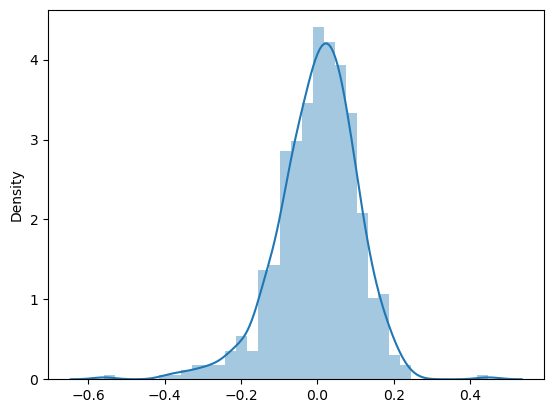

In [50]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train-y_train_pred
sns.distplot(res)
plt.show()

## Predictions and evaluation on the TEST Set

In [51]:
df_test.columns

Index(['year_2019', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'cloudy', 'rainy', 'monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'february', 'march', 'april', 'may',
       'june', 'july', 'august', 'september', 'october', 'november',
       'december', 'summer', 'fall', 'winter'],
      dtype='object')

In [52]:
y_test = df_test['cnt']
X_test = df_test.drop(columns=['cnt'])

In [53]:
X_train_new = X_train_sm.drop(["const"], axis = 1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lr_model.predict(X_test_new)

In [54]:
r2_score(y_true=y_test, y_pred=y_pred)
#Adj. R-squared:	0.782

0.7503815105336974

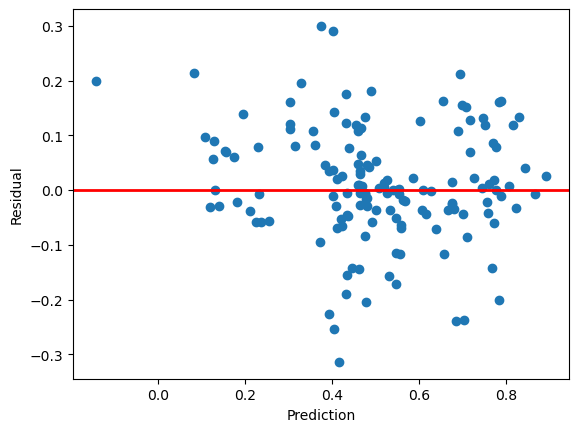

In [55]:
plt.scatter(y_pred, y_test - y_pred)
plt.ylabel('Residual')
plt.xlabel('Prediction')
plt.axhline(lw=2, color='red')
plt.show()

## Model 2 - Using all variables -

In [56]:
# building a model with all variables
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.26e-215
Time:                        10:03:15   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     555   BIC:                            -1042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1624      0.028      5.790      0.000       0.107       0.217
year_2019      0.2293      0.007     31.082      0.000       0.215       0.244
holiday       -0.0417      0.021     -2.013      0.045      -0.082      -0.001
workingday     0.0494      0.008      5.933      0.000       0.033       0.066
temp           0.3825      0.135      2.828      0.005       0.117       0.648
atemp          0.0680      0.133      0.510      0.610      -0.194       0.330
humidity      -0.1444      0.036     -3.993      0.000      -0.215      -0.073
windspeed     -0.1789      0.024     -7.352      0.000      -0.227      -0.131
cloudy        -0.0592      0.010     -6.127      0.000      -0.078      -0.040
rainy         -0.2625      0.025    -10.458      0.000      -0.312      -0.213
monday        -0.0101      0.009     -1.127      0.260      -0.028       0.007
tuesday       -0.0086      0.010     -0.858      0.391      -0.028       0.011
wednesday      0.0071      0.010      0.748      0.455      -0.012       0.026
thursday       0.0046      0.010      0.461      0.645      -0.015       0.024
friday         0.0146      0.010      1.417      0.157      -0.006       0.035
saturday       0.0605      0.013      4.616      0.000       0.035       0.086
february       0.0300      0.018      1.628      0.104      -0.006       0.066
march          0.0616      0.021      2.987      0.003       0.021       0.102
april          0.0587      0.031      1.875      0.061      -0.003       0.120
may            0.0776      0.034      2.310      0.021       0.012       0.144
june           0.0692      0.036      1.947      0.052      -0.001       0.139
july           0.0249      0.040      0.627      0.531      -0.053       0.103
august         0.0773      0.038      2.037      0.042       0.003       0.152
september      0.1366      0.034      4.067      0.000       0.071       0.203
october        0.0719      0.030      2.359      0.019       0.012       0.132
november       0.0085      0.029      0.290      0.772      -0.049       0.066
december       0.0068      0.023      0.296      0.767      -0.038       0.052
summer         0.0978      0.022      4.366      0.000       0.054       0.142
fall           0.0564      0.027      2.068      0.039       0.003       0.110
winter         0.1646      0.023      7.225      0.000       0.120       0.209
==============================================================================
Omnibus:                      106.744   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.955
Skew:                          -0.888   Prob(JB):                     6.02e-67
Kurtosis:                       6.062   Cond. No.                     6.72e+15
==============================================================================

N

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,thursday,inf
13,friday,inf
2,workingday,inf
1,holiday,inf
9,monday,inf
10,tuesday,inf
11,wednesday,inf
3,temp,480.91
4,atemp,423.70
5,humidity,20.89


In [58]:
X = X_train.drop("thursday", axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,480.91
4,atemp,423.70
5,humidity,20.89
26,fall,14.48
20,august,10.06
27,winter,10.05
25,summer,9.55
19,july,9.16
2,workingday,8.93
17,may,7.59


In [59]:
X = X.drop("temp", axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,atemp,41.09
4,humidity,20.83
25,fall,14.37
26,winter,10.04
24,summer,9.55
19,august,9.48
2,workingday,8.93
18,july,8.73
16,may,7.30
17,june,6.96


In [60]:
X = X.drop("atemp", axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,humidity,15.85
24,fall,14.15
25,winter,9.98
23,summer,9.55
2,workingday,8.84
18,august,7.01
17,july,5.94
20,october,5.68
19,september,5.33
15,may,5.30


In [61]:
X = X.drop("humidity", axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
23,fall,14.14
24,winter,9.96
22,summer,9.54
2,workingday,8.32
17,august,6.57
16,july,5.59
19,october,5.23
18,september,4.87
14,may,4.82
20,november,4.73


In [62]:
X = X.drop("fall", axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,8.29
23,winter,7.26
22,summer,6.64
19,october,4.23
3,windspeed,4.21
20,november,3.86
14,may,3.79
13,april,3.60
21,december,2.55
15,june,2.31


In [63]:
X = X.drop("workingday", axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
22,winter,7.25
21,summer,6.64
18,october,4.17
2,windspeed,4.07
19,november,3.78
13,may,3.69
12,april,3.55
20,december,2.47
14,june,2.23
0,year_2019,1.97


In [64]:
X = X.drop("winter", axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
21,summer,6.64
2,windspeed,4.04
13,may,3.69
12,april,3.55
14,june,2.23
0,year_2019,1.97
11,march,1.77
3,cloudy,1.56
5,monday,1.53
7,wednesday,1.46


In [65]:
X = X.drop("summer", axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,windspeed,4.04
0,year_2019,1.97
3,cloudy,1.55
5,monday,1.53
11,march,1.50
12,april,1.49
9,saturday,1.46
7,wednesday,1.46
18,october,1.43
10,february,1.43


In [66]:
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     110.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.86e-183
Time:                        10:03:17   Log-Likelihood:                 518.54
No. Observations:                 584   AIC:                            -993.1
Df Residuals:                     562   BIC:                            -896.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1946      0.019     10.272      0.000       0.157       0.232
year_2019      0.2454      0.008     29.051      0.000       0.229       0.262
holiday       -0.0913      0.027     -3.380      0.001      -0.144      -0.038
windspeed     -0.1818      0.027     -6.854      0.000      -0.234      -0.130
cloudy        -0.0826      0.009     -9.069      0.000      -0.100      -0.065
rainy         -0.3111      0.027    -11.671      0.000      -0.363      -0.259
monday         0.0169      0.014      1.227      0.220      -0.010       0.044
tuesday        0.0210      0.014      1.505      0.133      -0.006       0.048
wednesday      0.0353      0.013      2.647      0.008       0.009       0.061
friday         0.0400      0.014      2.779      0.006       0.012       0.068
saturday       0.0360      0.013      2.685      0.007       0.010       0.062
february       0.0691      0.021      3.277      0.001       0.028       0.111
march          0.1896      0.020      9.461      0.000       0.150       0.229
april          0.2890      0.021     13.818      0.000       0.248       0.330
may            0.3637      0.020     17.985      0.000       0.324       0.403
june           0.3985      0.021     19.026      0.000       0.357       0.440
july           0.3631      0.021     17.136      0.000       0.322       0.405
august         0.3866      0.020     19.254      0.000       0.347       0.426
september      0.4240      0.021     20.466      0.000       0.383       0.465
october        0.3678      0.020     18.340      0.000       0.328       0.407
november       0.2488      0.021     12.064      0.000       0.208       0.289
december       0.1582      0.020      7.828      0.000       0.119       0.198
==============================================================================
Omnibus:                       96.796   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.045
Skew:                          -0.797   Prob(JB):                     1.27e-62
Kurtosis:                       6.029   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
X = X.drop("monday", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     115.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.61e-184
Time:                        10:03:17   Log-Likelihood:                 517.75
No. Observations:                 584   AIC:                            -993.5
Df Residuals:                     563   BIC:                            -901.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1997      0.018     10.799      0.000       0.163       0.236
year_2019      0.2455      0.008     29.058      0.000       0.229       0.262
holiday       -0.0838      0.026     -3.184      0.002      -0.136      -0.032
windspeed     -0.1808      0.027     -6.819      0.000      -0.233      -0.129
cloudy        -0.0819      0.009     -9.004      0.000      -0.100      -0.064
rainy         -0.3108      0.027    -11.655      0.000      -0.363      -0.258
tuesday        0.0155      0.013      1.172      0.242      -0.010       0.041
wednesday      0.0298      0.013      2.372      0.018       0.005       0.054
friday         0.0344      0.014      2.520      0.012       0.008       0.061
saturday       0.0306      0.013      2.414      0.016       0.006       0.055
february       0.0689      0.021      3.267      0.001       0.027       0.110
march          0.1894      0.020      9.446      0.000       0.150       0.229
april          0.2888      0.021     13.803      0.000       0.248       0.330
may            0.3634      0.020     17.962      0.000       0.324       0.403
june           0.3982      0.021     19.004      0.000       0.357       0.439
july           0.3626      0.021     17.107      0.000       0.321       0.404
august         0.3862      0.020     19.230      0.000       0.347       0.426
september      0.4233      0.021     20.430      0.000       0.383       0.464
october        0.3679      0.020     18.336      0.000       0.328       0.407
november       0.2478      0.021     12.019      0.000       0.207       0.288
december       0.1580      0.020      7.813      0.000       0.118       0.198
==============================================================================
Omnibus:                       97.805   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.261
Skew:                          -0.807   Prob(JB):                     6.90e-63
Kurtosis:                       6.026   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X = X.drop("tuesday", axis=1)
# building a model with all variables
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          6.38e-185
Time:                        10:03:17   Log-Likelihood:                 517.04
No. Observations:                 584   AIC:                            -994.1
Df Residuals:                     564   BIC:                            -906.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2030      0.018     11.113      0.000       0.167       0.239
year_2019      0.2454      0.008     29.035      0.000       0.229       0.262
holiday       -0.0861      0.026     -3.278      0.001      -0.138      -0.035
windspeed     -0.1807      0.027     -6.813      0.000      -0.233      -0.129
cloudy        -0.0816      0.009     -8.971      0.000      -0.099      -0.064
rainy         -0.3115      0.027    -11.680      0.000      -0.364      -0.259
wednesday      0.0261      0.012      2.148      0.032       0.002       0.050
friday         0.0307      0.013      2.311      0.021       0.005       0.057
saturday       0.0269      0.012      2.192      0.029       0.003       0.051
february       0.0696      0.021      3.301      0.001       0.028       0.111
march          0.1893      0.020      9.439      0.000       0.150       0.229
april          0.2889      0.021     13.802      0.000       0.248       0.330
may            0.3641      0.020     17.998      0.000       0.324       0.404
june           0.3978      0.021     18.984      0.000       0.357       0.439
july           0.3633      0.021     17.145      0.000       0.322       0.405
august         0.3866      0.020     19.246      0.000       0.347       0.426
september      0.4233      0.021     20.425      0.000       0.383       0.464
october        0.3686      0.020     18.375      0.000       0.329       0.408
november       0.2482      0.021     12.038      0.000       0.208       0.289
december       0.1579      0.020      7.806      0.000       0.118       0.198
==============================================================================
Omnibus:                       95.942   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.002
Skew:                          -0.803   Prob(JB):                     8.62e-60
Kurtosis:                       5.933   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,windspeed,3.91
0,year_2019,1.96
3,cloudy,1.52
10,april,1.46
9,march,1.46
8,february,1.39
16,october,1.36
11,may,1.33
14,august,1.33
18,december,1.32


### Model 2 - Residual Analysis of the train data

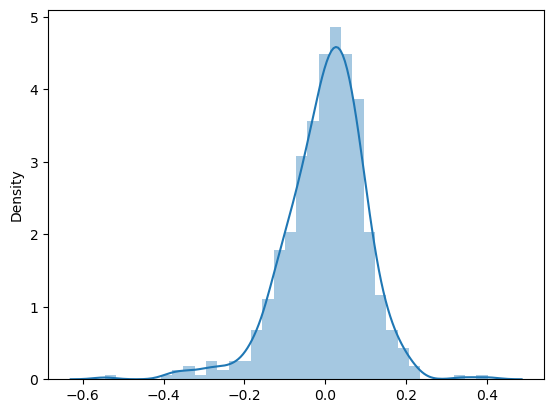

In [70]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train-y_train_pred
sns.distplot(res)
plt.show()

### Model 2-Predictions and evaluation on the TEST Set

In [71]:
# X and y test set
y_test = df_test['cnt']
X_test = df_test.drop(columns=['cnt'])

X_train_new = X_train_sm.drop(["const"], axis = 1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lr_model.predict(X_test_new)

In [72]:
r2_score(y_true=y_test, y_pred=y_pred)
# Adj. R-squared:	0.797

0.7429577863863636

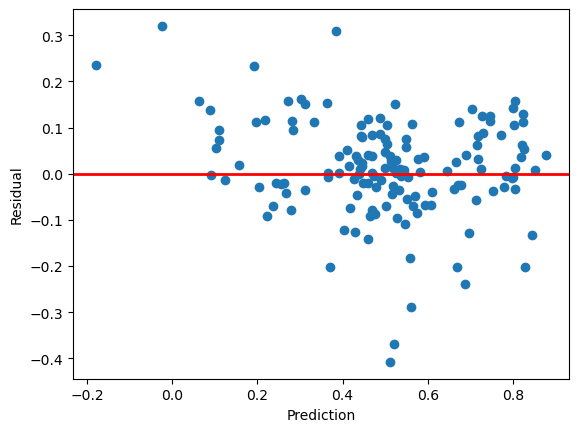

In [73]:
plt.scatter(y_pred, y_test - y_pred)
plt.ylabel('Residual')
plt.xlabel('Prediction')
plt.axhline(lw=2, color='red')
plt.show()

## **Using RFE**

## Model 3

In [74]:
X_train.columns

Index(['year_2019', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cloudy', 'rainy', 'monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'february', 'march', 'april', 'may',
       'june', 'july', 'august', 'september', 'october', 'november',
       'december', 'summer', 'fall', 'winter'],
      dtype='object')

In [75]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=25)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year_2019', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('cloudy', False, 2),
 ('rainy', True, 1),
 ('monday', False, 2),
 ('tuesday', False, 2),
 ('wednesday', False, 2),
 ('thursday', False, 2),
 ('friday', False, 2),
 ('saturday', False, 2),
 ('february', False, 2),
 ('march', True, 1),
 ('april', False, 2),
 ('may', True, 1),
 ('june', True, 1),
 ('july', False, 2),
 ('august', True, 1),
 ('september', True, 1),
 ('october', True, 1),
 ('november', False, 2),
 ('december', False, 2),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1)]

In [76]:
col = X_train.columns[rfe.support_]
col

Index(['year_2019', 'temp', 'atemp', 'humidity', 'windspeed', 'rainy', 'march',
       'may', 'june', 'august', 'september', 'october', 'summer', 'winter'],
      dtype='object')

In [77]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'cloudy', 'monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'february', 'april', 'july',
       'november', 'december', 'fall'],
      dtype='object')

In [78]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [79]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [80]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.36e-212
Time:                        10:03:19   Log-Likelihood:                 568.41
No. Observations:                 584   AIC:                            -1107.
Df Residuals:                     569   BIC:                            -1041.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2635      0.025     10.355      0.0

In [81]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [82]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [83]:
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     221.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.13e-213
Time:                        10:03:19   Log-Likelihood:                 568.24
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     570   BIC:                            -1047.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2645      0.025     10.419      0.0

In [84]:
X_train_new = X_train_new.drop(["june"], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     240.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.39e-214
Time:                        10:03:19   Log-Likelihood:                 567.71
No. Observations:                 584   AIC:                            -1109.
Df Residuals:                     571   BIC:                            -1053.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2644      0.025     10.416      0.0

In [85]:
X_train_new = X_train_new.drop(["may"], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     261.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.78e-215
Time:                        10:03:19   Log-Likelihood:                 567.10
No. Observations:                 584   AIC:                            -1110.
Df Residuals:                     572   BIC:                            -1058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2611      0.025     10.358      0.0

### Model 3 - Residual Analysis of the train data

Text(0.5, 0, 'Errors')

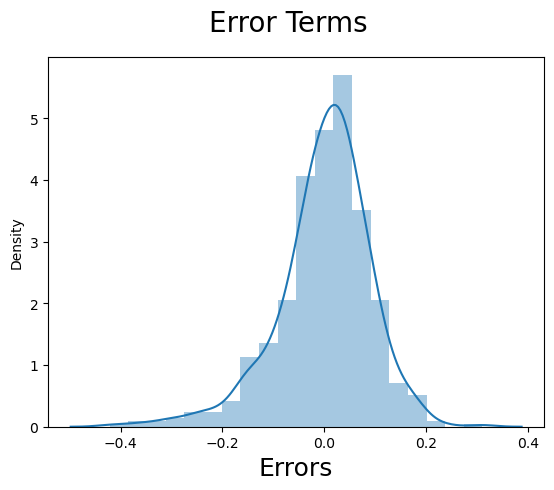

In [86]:
y_train_cnt = lm.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

### Model 3 - Making Predictions

In [87]:
# divide into X and y test set
y_test = df_test['cnt']
X_test = df_test.drop(columns=['cnt'])

X_train_new = X_train_new.drop(columns=['const'])
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

In [88]:
r2_score(y_true=y_test, y_pred=y_pred)
# Adj. R-squared: 0.831

0.7803281283513069

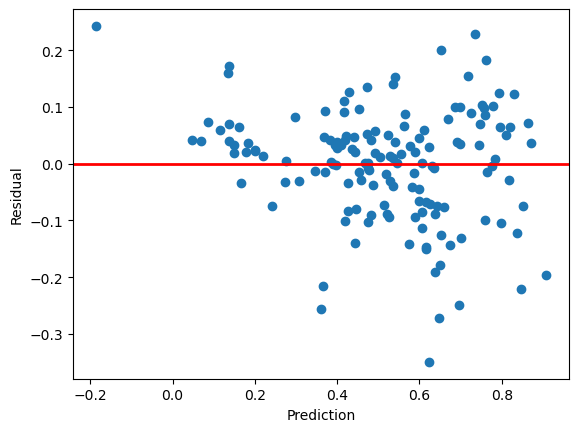

In [89]:
plt.scatter(y_pred, y_test - y_pred)
plt.ylabel('Residual')
plt.xlabel('Prediction')
plt.axhline(lw=2, color='red')
plt.show()

## Model 4

In [90]:
vif = pd.DataFrame()
#X_train_vif = X_train_new.drop(columns=['const'])
X_train_vif = X_train_new
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,humidity,10.17
1,temp,8.80
3,windspeed,3.67
10,winter,2.34
0,year_2019,2.01
9,summer,1.84
8,october,1.67
6,august,1.56
7,september,1.34
5,march,1.19


In [91]:
X_train_new = X_train_new.drop(["humidity"], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.34e-198
Time:                        10:03:21   Log-Likelihood:                 524.05
No. Observations:                 584   AIC:                            -1026.
Df Residuals:                     573   BIC:                            -978.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0716      0.017      4.295      0.0

In [92]:
vif = pd.DataFrame()
#X_train_vif =  X_train_new.drop(columns=['const'])
X_train_vif =  X_train_new
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,3.16
0,year_2019,2.00
9,winter,2.00
8,summer,1.82
7,october,1.67
5,august,1.56
6,september,1.33
4,march,1.16
3,rainy,1.07


### Model 4-Residual Analysis of the train data

In [93]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

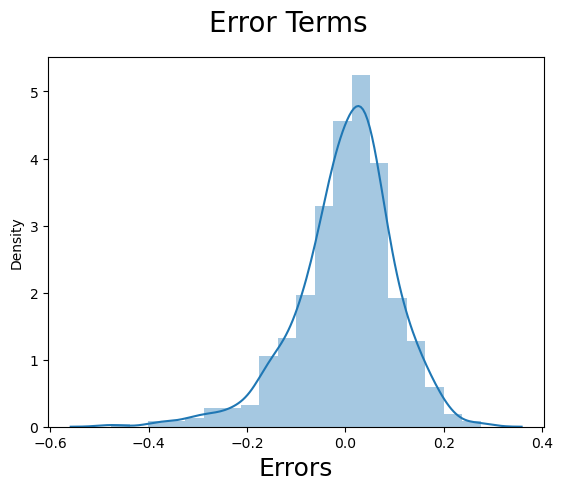

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Model 4-Making Predictions

### Scaling applied on the test sets in the begining

### Dividing into X_test and y_test

In [95]:
y_test = df_test['cnt']
X_test = df_test.drop(columns=['cnt'])

In [96]:
#X_train_new = X_train_new.drop(columns=['const'])
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

In [97]:
print(r2_score(y_true=y_test, y_pred=y_pred))
print(r2_score(y_true=y_train , y_pred=y_train_cnt))
# Adj. R-squared: 0.805

0.7365080723493498
0.8080501480809285


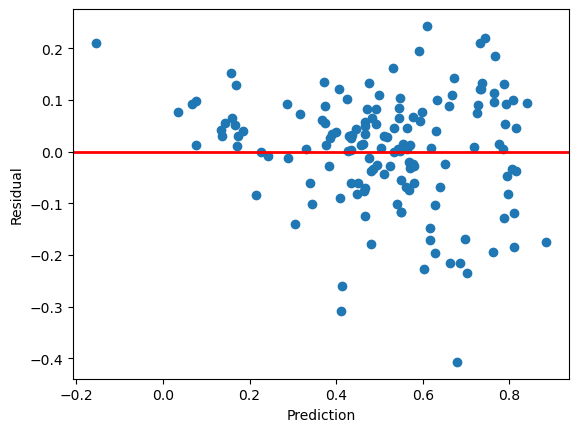

In [98]:
plt.scatter(y_pred, y_test - y_pred)
plt.ylabel('Residual')
plt.xlabel('Prediction')
plt.axhline(lw=2, color='red')
plt.show()